In [1]:
from A3b_rhl72 import *
from matplotlib import pyplot as plt
import numpy as np

### 1a. A Moving Average Filter

Filtering is a model of how a system responds to a signal.
It can be described as a transformation of one signal to another.

### Moving Average filter 
$$
y_M[n] = \frac{1}{M}\sum_{k=0}^{M-1} x[n-k]
$$

$$
y_M[n] = \lambda_{yM-1}[n-1]+(1+\lambda)x[n]
$$

$$
y[n] = \lambda_{y}[n-1]+(1+\lambda)x[n]
$$

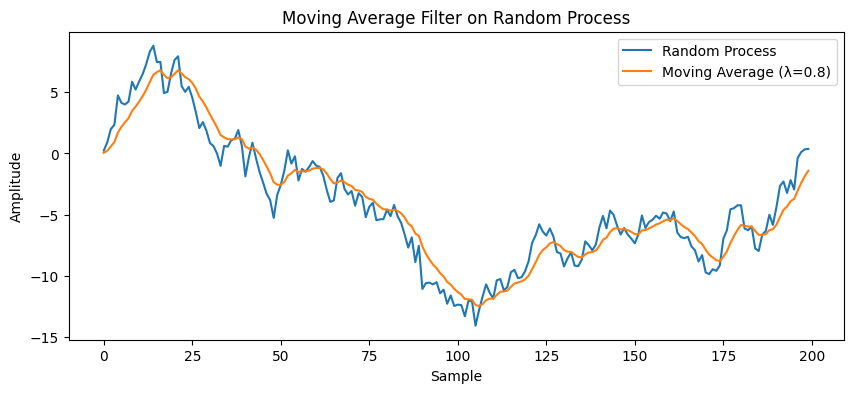

In [2]:
N = 200
sigma_val = 1
lam = 0.8

x_rand = randprocess(N, sigma=sigma_val)
y_movavg = movingavg(x_rand, lam=lam)
plt.figure(figsize=(10,4))
plt.plot(x_rand, label='Random Process')
plt.plot(y_movavg, label=f'Moving Average (\u03BB={lam})')
plt.title("Moving Average Filter on Random Process")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

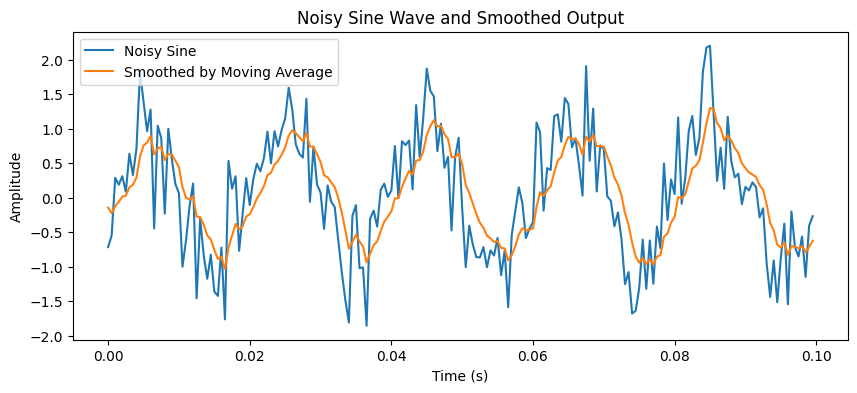

In [3]:
fs = 2000
duration = 0.1
t = np.linspace(0, duration, int(fs*duration), endpoint=False)
sine_noisy = noisy_sine(t, freq=50, noise_amp=0.5)
y_movavg_sine = movingavg(sine_noisy, lam=lam)
plt.figure(figsize=(10,4))
plt.plot(t, sine_noisy, label="Noisy Sine")
plt.plot(t, y_movavg_sine, label="Smoothed by Moving Average")
plt.title("Noisy Sine Wave and Smoothed Output")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### First Order IIR filter

We can generalize the functions above to be a function of both previous output and previous input. 
We can have arbitrary values for the multiplicative factors.
$$
y[n] = a_1y[n-1] + b_0x[n] + b_1x[n-1]
$$

### Second Order IIR filter
$$
y[n] = a_1[n-1] + a_2y[n-2] + b_0x[n] + b_1x[n-1] + b_2x[n-2]
$$

### General IIR difference equation

to the nth power

$$
\sum_{k=0}^{N-1}a_ky[n-k] = \sum_{k=0}^{M-1}b_kx[n-k]
$$

usually we assum $a_0$ = 1 so

$$
y[n] = \sum_{k=0}^{M-1}b_kx[n-k] - \sum_{k=1}^{N-1}a_ky[n-k]
$$

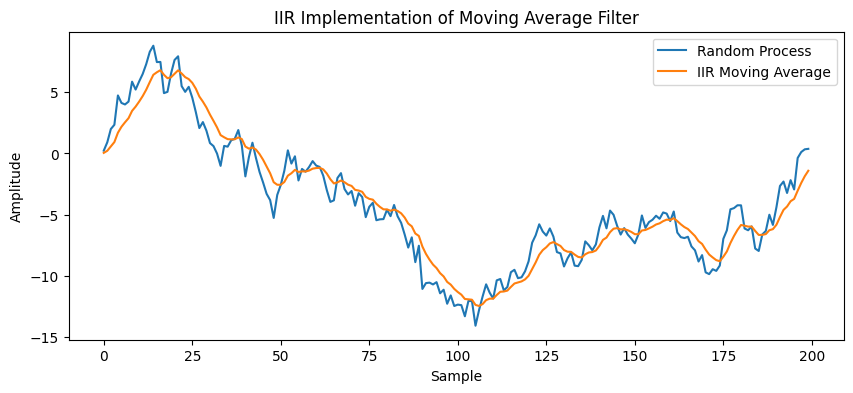

In [4]:
a_mov = np.array([1, -lam])
b_mov = np.array([1 - lam])
y_iir_mov = filterIIR(x_rand, a_mov, b_mov)
plt.figure(figsize=(10,4))
plt.plot(x_rand, label="Random Process")
plt.plot(y_iir_mov, label="IIR Moving Average")
plt.title("IIR Implementation of Moving Average Filter")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### 2b. First Order Low-pass and High-pass IIR Filters

Implement two first order IIR filters with these coefficients:

- **Low-pass filter:**  
  $$ a = [1, -0.9], \quad b = [0.1] $$  
  This filter smooths the signal by passing lower frequencies while attenuating higher frequencies.

- **High-pass filter:**  
  $$ a = [1, 0.9], \quad b = [0.1] $$  
  This filter emphasizes rapid changes by attenuating lower frequencies.


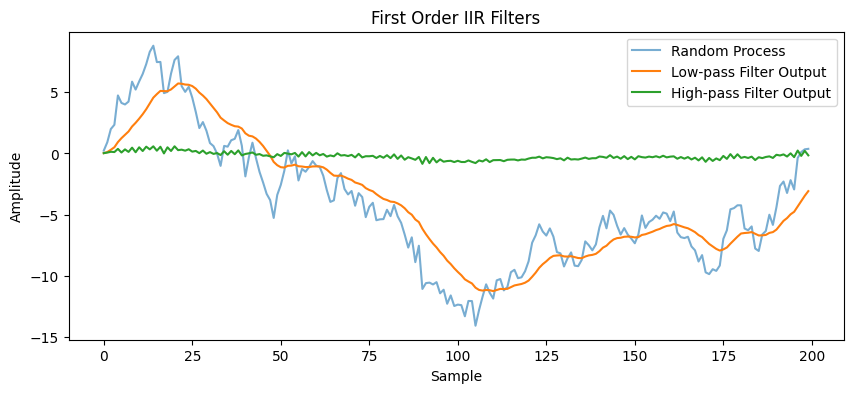

In [5]:
 a_low = np.array([1, -0.9])
b_low = np.array([0.1])
y_low = filterIIR(x_rand, a_low, b_low)

a_high = np.array([1, 0.9])
b_high = np.array([0.1])
y_high = filterIIR(x_rand, a_high, b_high)

plt.figure(figsize=(10,4))
plt.plot(x_rand, label="Random Process", alpha=0.6)
plt.plot(y_low, label="Low-pass Filter Output")
plt.plot(y_high, label="High-pass Filter Output")
plt.title("First Order IIR Filters")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### 2c. Second Order Bandpass Filters

A second order IIR bandpass filter can be implemented using coefficients such as:

- **Bandpass Filter Set 1:**  
  $$ a = [1, -1.265, 0.81], \quad b = [0.135, 0, 0] $$

- **Bandpass Filter Set 2:**  
  $$ a = [1, -1.702, 0.81], \quad b = [0.063, 0, 0] $$

These filters are designed to pass a specific band of frequencies while attenuating frequencies outside that band.


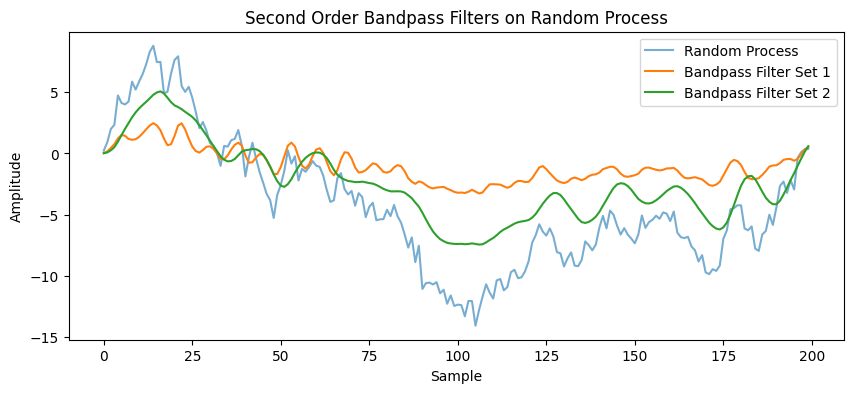

In [6]:
a_band1 = np.array([1, -1.265, 0.81])
b_band1 = np.array([0.135, 0, 0])
y_band1 = filterIIR(x_rand, a_band1, b_band1)

a_band2 = np.array([1, -1.702, 0.81])
b_band2 = np.array([0.063, 0, 0])
y_band2 = filterIIR(x_rand, a_band2, b_band2)

plt.figure(figsize=(10,4))
plt.plot(x_rand, label="Random Process", alpha=0.6)
plt.plot(y_band1, label="Bandpass Filter Set 1")
plt.plot(y_band2, label="Bandpass Filter Set 2")
plt.title("Second Order Bandpass Filters on Random Process")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### 2d. Characterizing the Filter Response

To characterize the filter response:
- Generate a noisy sine wave using a sampling frequency of 2 kHz and a signal duration of 100 msec.
- Create a 4×4 matrix of plots by varying the sine frequency (rows) and noise level (columns).
- Ensure the y-axes are consistent across plots.
- Additionally, vary an input sine frequency (without noise) from 0 to the Nyquist frequency and plot the output signal power versus frequency.

This analysis helps in understanding the filter’s behavior over a range of conditions.


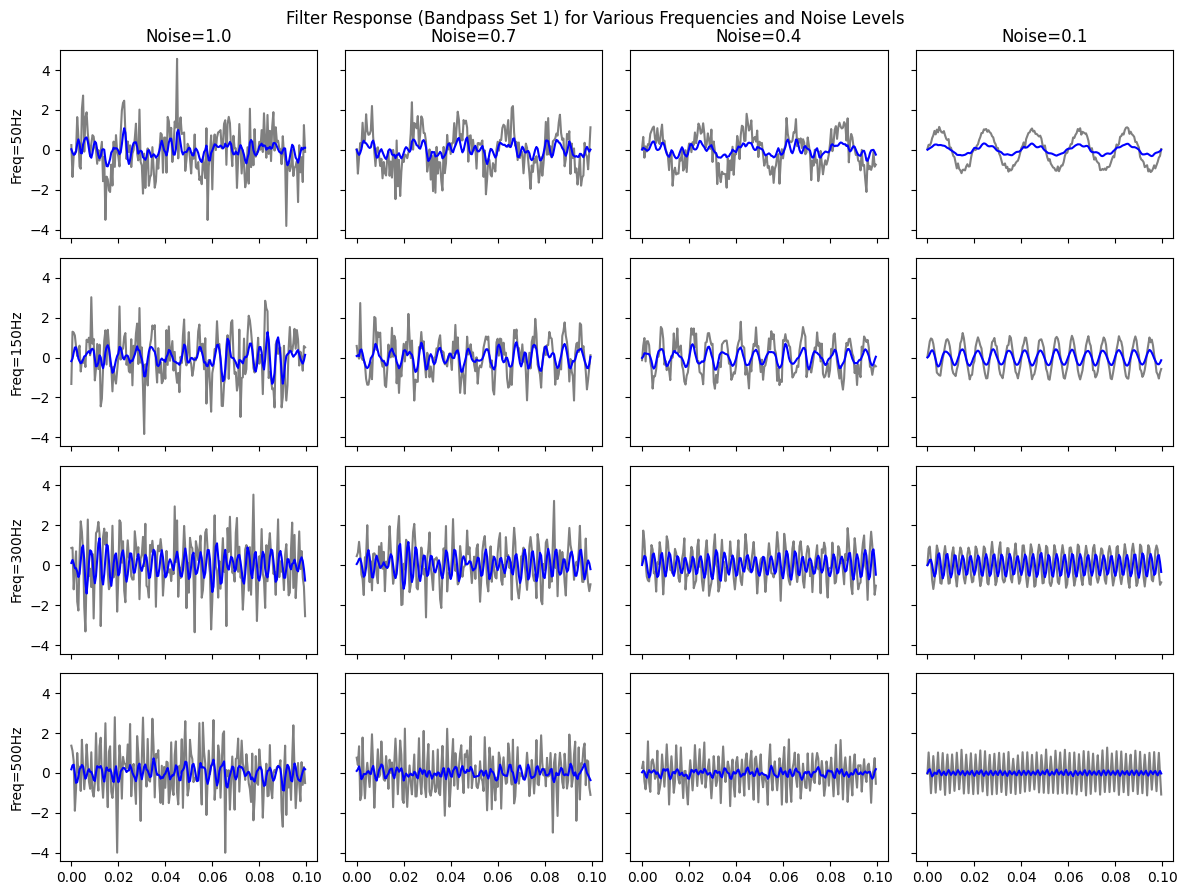

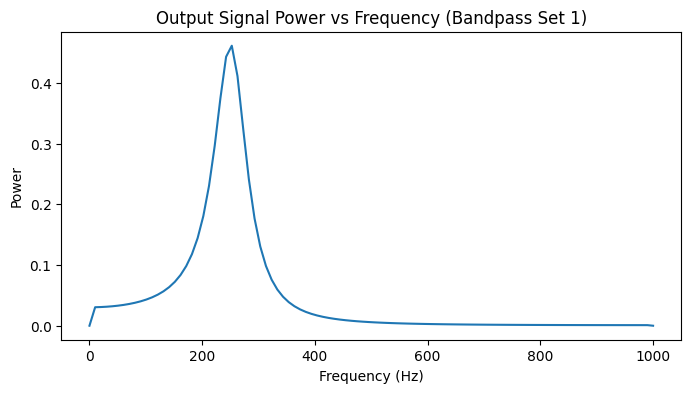

In [7]:
# (i) Generate a noisy sine wave with different frequencies and noise levels,
# then filter using Bandpass Filter Set 1.
freqs = [50, 150, 300, 500]      # Frequencies (Hz) for the rows
noise_levels = [1.0, 0.7, 0.4, 0.1]  # Noise amplitudes for the columns

fig, axes = plt.subplots(4, 4, figsize=(12, 10), sharex=True, sharey=True)
for i, f in enumerate(freqs):
    for j, noise_amp in enumerate(noise_levels):
        t = np.linspace(0, duration, int(fs*duration), endpoint=False)
        sine_noisy = noisy_sine(t, freq=f, noise_amp=noise_amp)
        y_filtered = filterIIR(sine_noisy, a_band1, b_band1)
        axes[i, j].plot(t, sine_noisy, label="Input", color='gray')
        axes[i, j].plot(t, y_filtered, label="Filtered", color='blue')
        if i == 0:
            axes[i, j].set_title(f"Noise={noise_amp}")
        if j == 0:
            axes[i, j].set_ylabel(f"Freq={f}Hz")
plt.suptitle("Filter Response (Bandpass Set 1) for Various Frequencies and Noise Levels", y=0.92)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# (ii) Frequency response: vary input sine frequency from 0 to Nyquist (fs/2) and compute output power.
freqs_resp = np.linspace(0, fs/2, 100)
power_output = []
for f in freqs_resp:
    t = np.linspace(0, duration, int(fs*duration), endpoint=False)
    sine_wave = np.sin(2 * np.pi * f * t)
    y_out = filterIIR(sine_wave, a_band1, b_band1)
    power = np.mean(y_out**2)
    power_output.append(power)
plt.figure(figsize=(8,4))
plt.plot(freqs_resp, power_output)
plt.title("Output Signal Power vs Frequency (Bandpass Set 1)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

### 3. The Impulse Response Function

An impulse response $h[n]$ fully characterizes a linear time-invariant (LTI) system. Using the impulse response, the output for any input $x[n]$ is computed by convolution:

$$
y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k]\, h[n-k]
$$

**Assumptions:**

- **Linearity:**  
  The system obeys superposition:  
  $$
  H(\alpha\, x_1[n] + \beta\, x_2[n]) = \alpha\, H(x_1[n]) + \beta\, H(x_2[n])
  $$

- **Time-Invariance:**  
  A shift in the input signal results in an equivalent shift in the output:  
  $$
  H(x[n-n_0]) = y[n-n_0]
  $$

These properties allow us to predict the system response to any input signal.


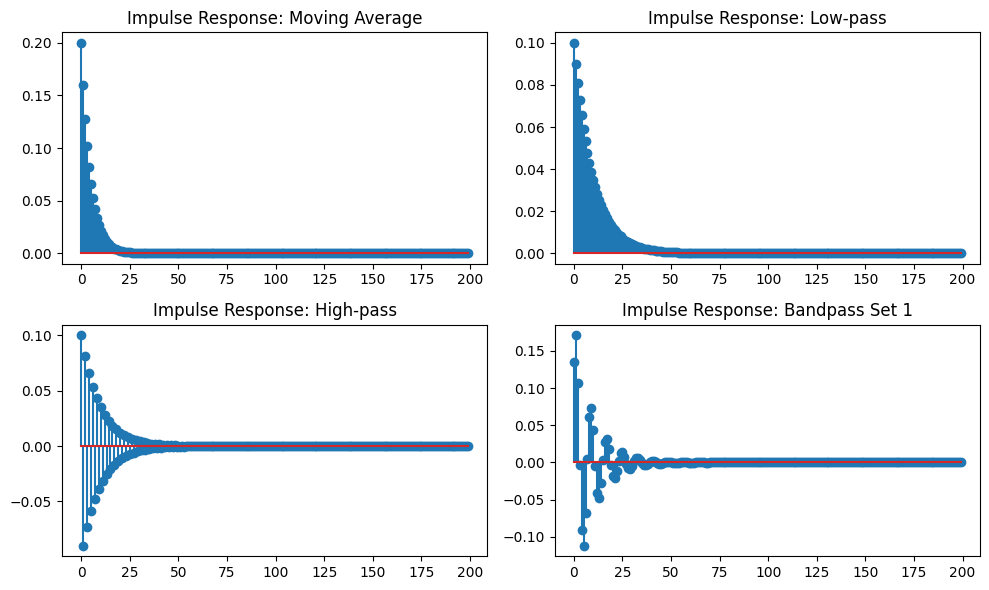

In [8]:
# Compute impulse responses by filtering an impulse (delta function).
impulse = np.zeros(N)
impulse[0] = 1  # delta at n=0
ir_movavg = filterIIR(impulse, a_mov, b_mov)
ir_low = filterIIR(impulse, a_low, b_low)
ir_high = filterIIR(impulse, a_high, b_high)
ir_band1 = filterIIR(impulse, a_band1, b_band1)

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.stem(ir_movavg)
plt.title("Impulse Response: Moving Average")
plt.subplot(2,2,2)
plt.stem(ir_low)
plt.title("Impulse Response: Low-pass")
plt.subplot(2,2,3)
plt.stem(ir_high)
plt.title("Impulse Response: High-pass")
plt.subplot(2,2,4)
plt.stem(ir_band1)
plt.title("Impulse Response: Bandpass Set 1")
plt.tight_layout()
plt.show()

### 4. Filtering with Convolution

Convolution combines two signals (the input $x[n]$ and the impulse response $h[n]$) as follows:

$$
y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k]\, h[n-k]
$$

For finite-length signals, the convolution is computed only over indices where both $x[n]$ and $h[n]$ are defined. The parameter $i_0$ specifies the index of $h$ corresponding to time zero, allowing proper alignment of the signals.


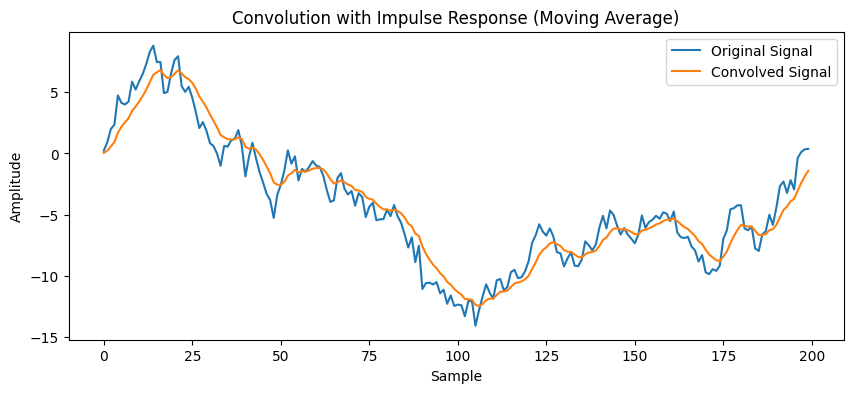

In [9]:
 # (a) Demonstrate the convolution function by convolving x_rand with the impulse response of the moving average filter.
# For the moving average filter the impulse response is causal so we use i0 = 0.
y_conv = convolve_signal(x_rand, ir_movavg, i0=0)

plt.figure(figsize=(10,4))
plt.plot(x_rand, label="Original Signal")
plt.plot(y_conv, label="Convolved Signal")
plt.title("Convolution with Impulse Response (Moving Average)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### 4b. FIR Filtering

FIR (Finite Impulse Response) filters use convolution with a finite-length kernel. For example, a Gabor kernel can be defined as:

$$
h(t) = e^{-t^2/(2\sigma^2)} \cos(2\pi f t)
$$

By selecting the significant (nonzero) portion of the kernel and centering it using the $i_0$ parameter, the FIR filter approximates the full convolution.


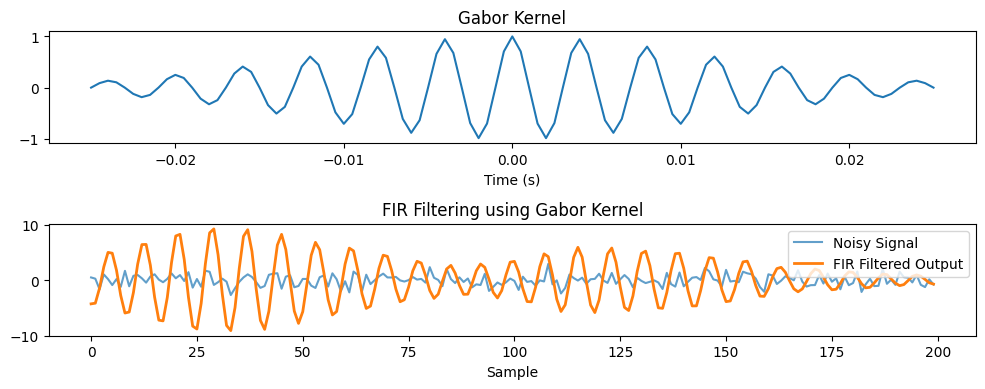

In [10]:
# (b) FIR Filtering using a Gabor kernel.
gabor_dur = 0.05  # seconds: duration of the Gabor kernel
gabor_freq = 250  # Hz
sigma_gabor = 3/250  
h_gabor, t_kernel = gabor_kernel(gabor_dur, fs, gabor_freq, sigma_gabor)
i0 = len(h_gabor) // 2  # index corresponding to time zero (center)

# Generate a noise signal and filter it using the Gabor kernel via convolution.
noise_signal = np.random.randn(N)
y_fir = convolve_signal(noise_signal, h_gabor, i0=i0)

plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(t_kernel, h_gabor)
plt.title("Gabor Kernel")
plt.xlabel("Time (s)")
plt.subplot(2,1,2)
plt.plot(noise_signal, label="Noisy Signal", alpha=0.7)
plt.plot(y_fir, label="FIR Filtered Output", linewidth=2)
plt.title("FIR Filtering using Gabor Kernel")
plt.xlabel("Sample")
plt.legend()
plt.tight_layout()
plt.show()
    

### 4c. Using Matched Filters to Detect Signals in Noise

A matched filter is designed to detect a known signal template in noisy data. For example, using a gammatone function:

$$
g(t) = t^{(n-1)} e^{-2\pi b t} \cos(2\pi f t)
$$

The matched filter is obtained by time-reversing the signal template and then convolving it with the noisy input. This process enhances the presence of the target signal relative to the noise.


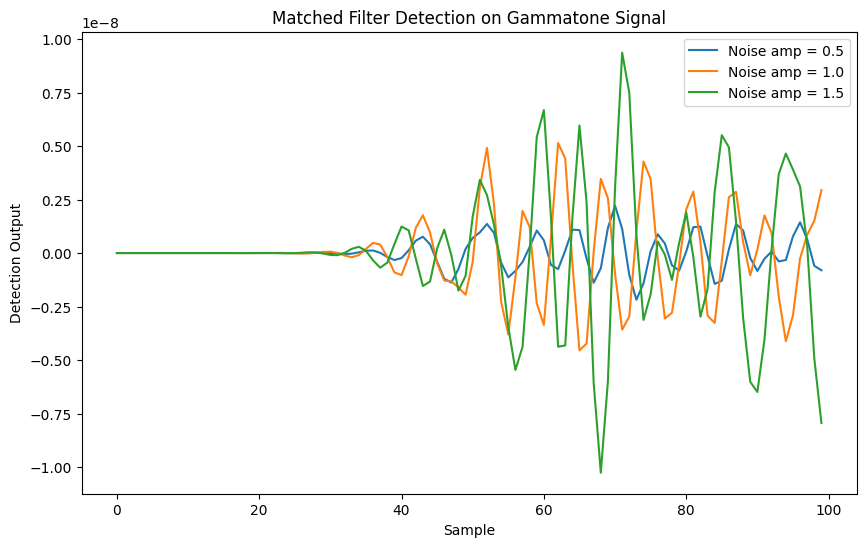

In [11]:
 # Generate a gammatone signal (considered here as the signal of interest)
t_gt = np.linspace(0, 0.05, int(fs*0.05), endpoint=False)
gt_signal = gammatone(t_gt, n=4, b=150, f=300)
# Test detection under different noise levels.
noise_levels = [0.5, 1.0, 1.5]
plt.figure(figsize=(10,6))
for noise_amp in noise_levels:
    noisy_gt = gt_signal + noise_amp * np.random.randn(len(gt_signal))
    # The matched filter is the time-reversed gammatone signal.
    matched_filter = gt_signal[::-1]
    # Using np.convolve with 'same' mode for simplicity.
    detection = np.convolve(noisy_gt, matched_filter, mode='same')
    plt.plot(detection, label=f"Noise amp = {noise_amp}")
plt.title("Matched Filter Detection on Gammatone Signal")
plt.xlabel("Sample")
plt.ylabel("Detection Output")
plt.legend()
plt.show()